# Session 3: Model Evaluation

Welcome to Session 3! So far, we’ve covered supervised and unsupervised learning, and learned how to preprocess data and build models. Now, we’ll focus on evaluating model performanceThis is critical because building a model is just the first step – ensuring it performs well is equally important.

We will:

* Understand different model evaluation metrics.


1. Model Evaluation

After building a machine learning model, it is crucial to evaluate how well the model performs. Different types of models (e.g., classification, regression) require different evaluation metrics.

Step 1: Load a Dataset

For this session, we will use Breast Cancer Wisconsin dataset. We will use it for classification tasks and evaluate a model’s performance.



In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Add the target (0 = malignant, 1 = benign)
df['target'] = cancer_data.target

# Preview the dataset
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In this dataset:

* target = 0: Malignant (cancerous)
* target = 1: Benign (non-cancerous)

2. Data Preprocessing

We’ll split the dataset into training and test sets, as usual, to evaluate the model on unseen data.



In [2]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training (80%) and test sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Train a Random Forest Classifier


Let’s train a Random Forest classifier, which is an ensemble learning method that constructs multiple decision trees and merges them to get a more accurate and stable prediction.



In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

4. Model Evaluation Metrics

![](https://www.kdnuggets.com/wp-content/uploads/anello_machine_learning_evaluation_metrics_theory_overview_6.png)

Step 1: Accuracy
    
Let’s start by calculating the accuracy of the model on the test data.


What is Accuracy?

Accuracy is one of the most commonly used metrics for classification tasks. It measures the proportion of correct predictions made by the model.

Formula: 

![](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b1fd_644af4d67e9765a3455cf298_classification_guide_apc02.png)

In [4]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.49%


Step 2: Precision, Recall, and F1-Score

What are Precision and Recall?

* Precision: The proportion of true positive predictions out of all positive predictions made by the model. High precision means that when the model predicts positive, it’s often correct.

![](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b204_644af6c4d573412369556f6e_classification_guide_apc10.png)

* Recall: The proportion of true positives that the model correctly identified out of all actual positive cases.

![](https://cdn.prod.website-files.com/660ef16a9e0687d9cc27474a/662c426738658d748af1b1ef_644af7a5c21ca563bd25204a_classification_guide_apc15.png)

* F1-Score: The harmonic mean of precision and recall. It balances the two metrics and is useful when you need to balance precision and recall.

![](https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/639c3d2a22f93657640ef19f_f1-score-eqn.webp)


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.96
Recall: 0.99
F1-Score: 0.97


Step 3: Confusion Matrix


A confusion matrix gives us a more detailed view of how well the model performs in each category (malignant vs benign).



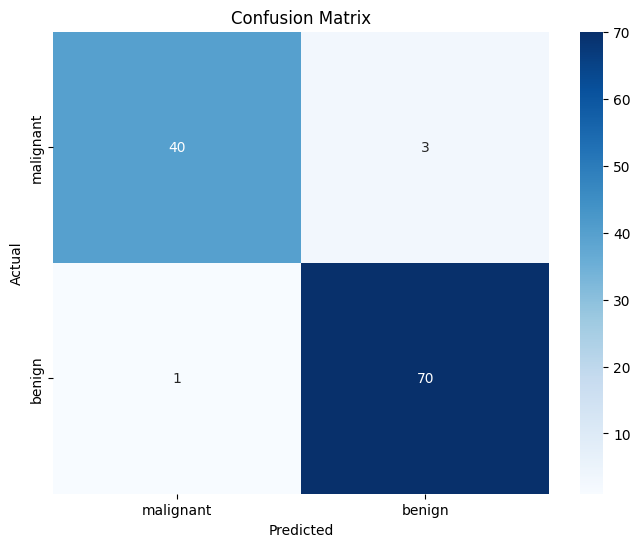

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


7. Summary of Session 3

In this session, we covered:

Model Evaluation Metrics: We explored accuracy, precision, recall, F1-score, and confusion matrix.
